# Customer Churn Prediction using Machine Learning



Menurut Zeniarja, J., & Luthfiarta, A. (2015) Pelanggan adalah aset yang paling penting dari semua jenis bisnis. Prospek usaha hanya mungkin dapat dilakukan dengan kehadiran pelanggan yang puas yang selalu setia dan membangun hubungan mereka dengan perusahaan. Untuk alasan ini, perusahaan harus merencanakan dan menerapkan strategi
untuk menciptakan pelanggan,umumnya dikenal sebagai Customer Relationship Management (CRM). 

Customer Relationship Management (CRM) merupakan strategi bisnis yang bertujuan untuk mengelola hubungan dengan pelanggan yang memadukan proses antara manusia dan teknologi. Sistem CRM bertujuan  untuk membantu, mempertahankan, mengelola, dan meningkatkan hubungan pelanggan setia dan langgeng atau di sebut juga dengan proses menejemen Churn. Pada artikel ini difokuskan untuk memprediksi pelanggan apakah Churn atau tidak dengan klasifikasi pelanggan. Churn prediction bertujuan untuk memprediksi peluang seorang pelanggan untuk churn sebelum pelanggan tersebut benar-benar melakukannya, dengan demikian provider bisa memberikan treatment untuk meminimalisir kemungkinan mereka churn. Prediksi akan dilakukan dengan menggunakan machine learning dengan sebuah algoritme supervised learning yang akan mengklasifikasikan pelanggan menjadi churn atau tidak churn di masa mendatang. 

Klasifikasi merupakan salah satu penerepan dari supervise machine learning 
- pengertian klasifikasi
- machine learning
- pengertian supervised learning
- 

pada artikel ini akan mengambil data dari DQLAB Telco yang pernah kita bahas dalam artikel sebelumnya mengenai data cleansing untuk yang belum membaca dan ingin mendalami lebih jauh mengenai data kleansing dapat membaca artikel [data cleansing](https://julius-risky.medium.com/data-cleaning-with-python-case-dqlab-telco-4a6fb5b17d8d) terlebih dahulu. DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan, DQlab tidak ingin mempunyai pelanggan yang beralih langganan ke kompetitor maka dari itu tujuan dari artikel ini dibuat karena penulis ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning. Semakin tinggi churn rate, semakin kecil revenue yang akan perusahaan raih di masa mendatang. 

### Tahapan Pemodelan Churn Prediction 

Langkah yang akan dilakukan adalah,

   1. Melakukan Exploratory Data Analysis
   2. Melakukan Data Pre-Processing
   3. Melakukan Pemodelan Machine Learning
   4. Menentukan Model Terbaik


# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

Pada artikel kali ini akan menggunakan beberapa package yang membantu kita dalam melakukan analisis data.
1. **Pandas** (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data. 
2. **Matplotlib** adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
3. **Seaborn** membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat lebih cantik.
4. **Scikit-learn** adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.
5. Xgboost adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)
6. jcopml merupakan package yang dibuat oleh Wira Dharma Kencana Putra, package ini mencakup fungsi untuk membantu visualisasi, tuning, pipeline, dan feature importance.

In [2]:
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco_final.csv")

#Tampilkan bentuk dari dataset
print(df.shape)

#Tampilkan 5 data teratas
print(df.head())

#Tampilkan jumlah ID yang unik
print(df.customerID.nunique())

(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

# 1. Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

   - Univariat Analysis — analisis deskriptif dengan satu variabel.
   - Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
   - Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, kamu diminta untuk melihat persebaran dari:

   - Prosentase persebaran data Churn dan tidaknya dari seluruh data
   - Persebarang data dari variable predictor terhadap label (Churn)


###  Memvisualisasikan Prosentase Churn

Kita ingin melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan. Gunakan fungsi value_counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart

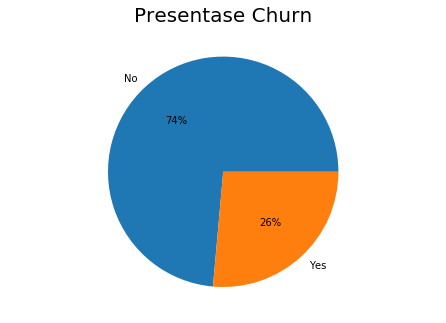

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Presentase Churn", fontsize=20)
plt.show()

Dari gambar diatas dapat dilihat bahwa sebaran data secara keseluruhan customer cenderung tidak melakukan churn, dengan detail churn sebanyak 26% dan NO churn sebnyak 74%

### Exploratory Data Analysis (EDA) Variabel Numerik

Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

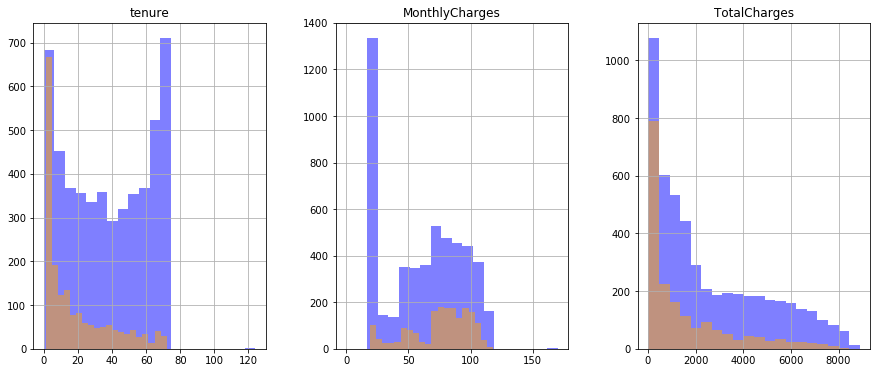

In [4]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

Dapat kita lihat pada chart MonthlyCharges ada kecenderungan semakin tinggi biaya bulanan yang dikenakan maka semakin tinggi juga kecenderunan untuk melakukan churn, dari grafik ini penyedia layanan dapat menetapkan harga disekitar 20 - 60 untuk mengurangi kecenderungan melakukan churn.

### Exploratory Data Analysis (EDA) Variabel Kategorik
Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya

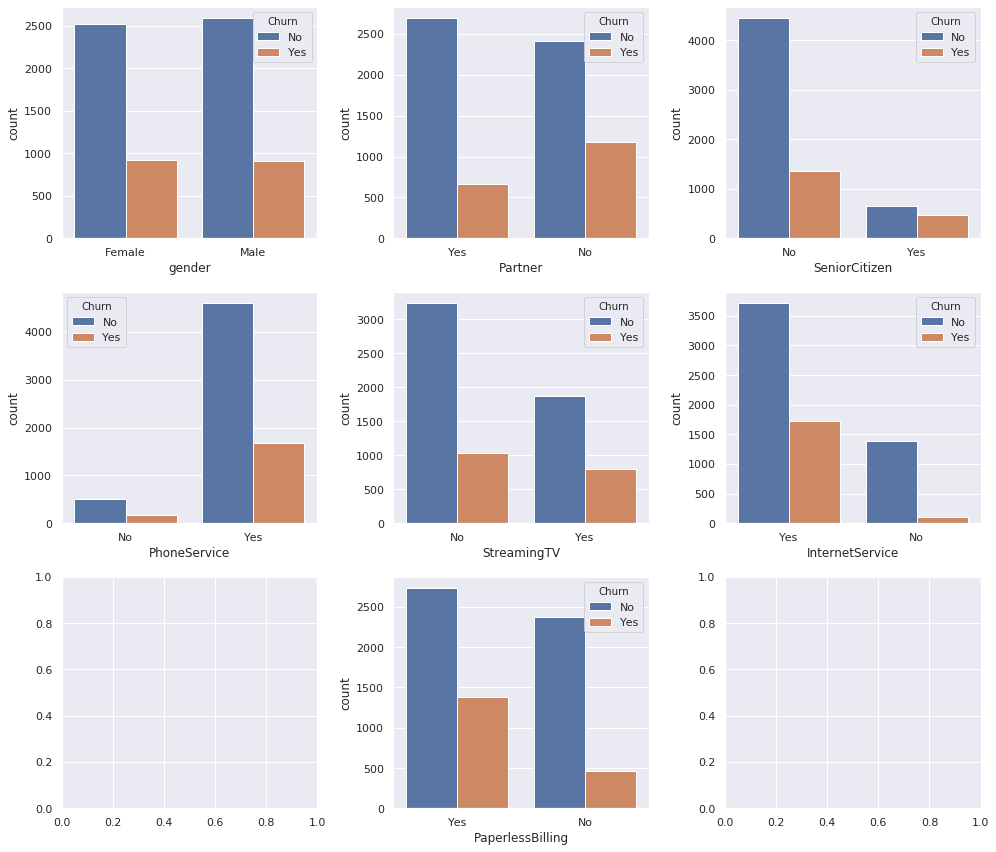

In [5]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

jika dilihat dari faktor jenis kelamin hampir tidak ada perbedaan yang signifikan untuk orang melakukan churn, sedangkan orang - orang yang melakukan churn adalah orang yang tidak memiliki pasangan, orang yang memiliki status senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

# 2. Melakukan Data PreProcessing

Setelah kita analisis , ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (customerID) & periode pengambilan datanya (UpdatedAt), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.


### Menghapus Unnecessary Columns dari data

Selanjutnya kita akan mengapus kolom yang tidak akan diikutsertakan dalam pemodelan, kemudian simpan dengan nama cleaned_df. Tampilkan 5 rows teratas nya.


In [6]:
cleaned_df=df.drop(columns=["customerID","UpdatedAt"], axis=1)
print(cleaned_df)

      gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0     Female            No     Yes       1           No          No   
1       Male            No     Yes      60          Yes          No   
2       Male            No      No       5          Yes         Yes   
3     Female            No     Yes      72          Yes         Yes   
4     Female            No     Yes      56          Yes         Yes   
...      ...           ...     ...     ...          ...         ...   
6945    Male            No      No       1          Yes          No   
6946  Female           Yes      No       1          Yes          No   
6947  Female            No      No       1          Yes         Yes   
6948  Female            No     Yes      72          Yes         Yes   
6949    Male            No      No      64          Yes          No   

     InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0                Yes              Yes           29.85         29.85    

### Encoding Data

Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric 

In [7]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    #Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

# DataSet Spliting

Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). Gunakan train_test_split() untuk membagi data tersebut. 

In [12]:
X = cleaned_df.drop(columns="Churn")
y = cleaned_df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,',sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,',sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) ,sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.735868
1    0.264132
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) ,sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.735731
1    0.264269
Name: Churn, dtype: float64


# 1. Training with Logistic Regression

In [19]:
log_reg = LogisticRegression().fit(X_train,y_train)
print(log_reg)

LogisticRegression()
Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3580
           1       0.64      0.49      0.56      1285

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.78      4865



## Evaluasi model

In [20]:
y_train_pred = log_reg.predict(X_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3580
           1       0.64      0.49      0.56      1285

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.78      4865



## Performansi Model Training - Menampilkan Plots

Setelah mendapatkan hasil classification report pada tahap sebelumnya, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

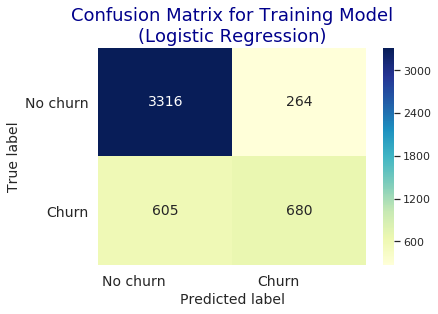

In [38]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

- Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 680, tebakan tidak churn yang sebenernya tidak churn adalah 3316, tebakan tidak churn yang sebenernya benar churn adalah 605 dan tebakan churn yang sebenernya tidak churn adalah 264.

## Performansi Data Testing - Menampilkan Metrics

In [58]:
y_test_pred = log_reg.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1534
           1       0.63      0.50      0.56       551

    accuracy                           0.79      2085
   macro avg       0.73      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



## Performansi Data Testing - Menampilkan Plots

Setelah menampilkan metrics pada tahap sebelumnya, sekarang kita akan melakukan visualisasi dari metrics yang sudah dihasilkan sebelumnya

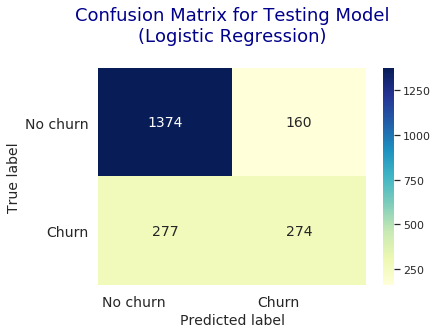

In [59]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

- Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 274, tebakan tidak churn yang sebenernya tidak churn adalah 1374, tebakan tidak churn yang sebenernya benar churn adalah 277 dan tebakan churn yang sebenernya tidak churn adalah 160.

### Logistic Regression train_accuracy : 79% | test_accuracy: 79%

# 2. Training with Random Forest

In [61]:
rdf_model = RandomForestClassifier().fit(X_train,y_train)
print(rdf_model)

RandomForestClassifier()


## Performansi Data Training - Menampilkan Metrics

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training seperti hasil di bawah ini. 

In [62]:
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      3580
           1       0.72      0.53      0.61      1285

    accuracy                           0.82      4865
   macro avg       0.78      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



## Plot confusion marix

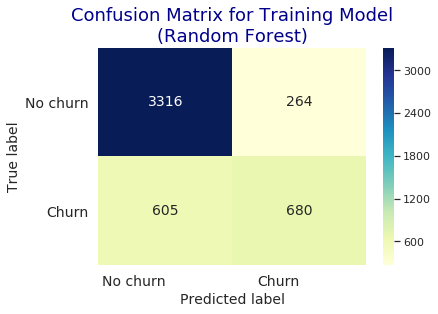

In [63]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

- Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan churn yang sebenernya benar churn adalah 1278, tebakan tidak churn yang sebenernya tidak churn adalah 3566, tebakan tidak churn yang sebenernya benar churn adalah 12 dan tebakan churn yang sebenernya tidak churn adalah 9.

## Performansi Data Training - Menampilkan Metrics

In [64]:
## Predict
y_test_pred = rdf_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1534
           1       0.57      0.48      0.52       551

    accuracy                           0.76      2085
   macro avg       0.69      0.67      0.68      2085
weighted avg       0.75      0.76      0.76      2085



## Performansi Data Testing - Menampilkan Plots

Setelah menampilkan metrics pada tahap sebelumnya, sekarang kita akan melakukan visualisasi dari metrics yang sudah dihasilkan sebelumnya

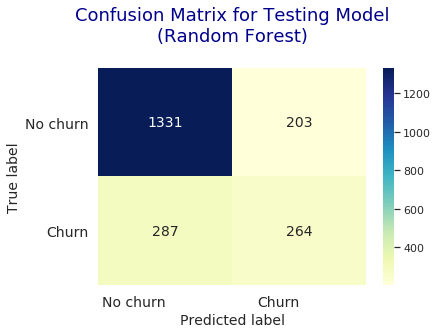

In [65]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

- jika kita menggunakan menggunakan algoritma Random Forest dengan memanggil RandomForestClassifier() dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
- Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan churn yang sebenernya benar churn adalah 262, tebakan tidak churn yang sebenernya tidak churn adalah 1360, tebakan tidak churn yang sebenernya benar churn adalah 284 dan tebakan churn yang sebenernya tidak churn adalah 179.

# 3. Training with Gboosting

In [46]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(X_train,y_train)
print(gbt_model)

GradientBoostingClassifier()


## Perfomansi Model Data Training - Menampilkan Metrics 

In [47]:
# Predict
y_train_pred = gbt_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      3580
           1       0.72      0.53      0.61      1285

    accuracy                           0.82      4865
   macro avg       0.78      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



## Perfomansi Model Data Training - Menampilkan Plots

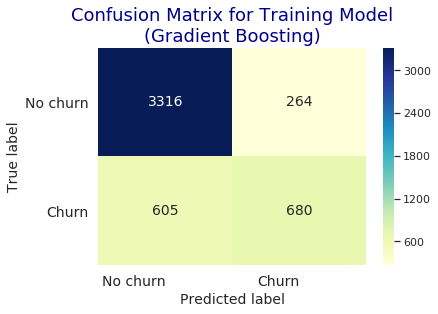

In [53]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Perfomansi Model Data Testing - Menampilkan Metrics 

In [54]:
# Predict
y_test_pred = gbt_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1534
           1       0.64      0.49      0.56       551

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



## Performansi Model Data Testing - Menampilkan Plots

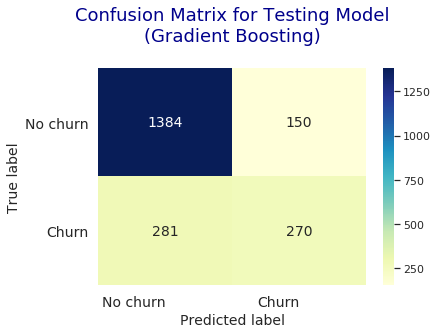

In [55]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


- Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.
- Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan churn yang sebenernya benar churn adalah 684, tebakan tidak churn yang sebenernya tidak churn adalah 3286, tebakan tidak churn yang sebenernya benar churn adalah 606 dan tebakan churn yang sebenernya tidak churn adalah 289.
- Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan churn yang sebenernya benar churn adalah 261, tebakan tidak churn yang sebenernya tidak churn adalah 1394, tebakan tidak churn yang sebenernya benar churn adalah 285 dan tebakan churn yang sebenernya tidak churn adalah 145.


Menentukan Algoritma Model Terbaik

Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

   - Over-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
   - Under-Fitting adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
   - Appropriate-Fitting adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

Selanjutnya kita akan menentukan model algoritma terbaik dari model yang sudah di lakukan di atas (Appropriate-Fitting), kemudian kita simpan sebagai file best_model_churn.pkl dengan tujuan untuk deployment model nantinya kita tidak perlu mengulang lagi pemodelan, cukup memanggil file tersebut saja. Simpan di file direktori sesuai dataset berada, kemudian check apakah file tersebut benar tersimpan atau tidak. Gunakan dump() dari pickle untuk menyimpan file. Anda bisa gunakan code dibawah ini untuk menyimpan file model untuk di coba di local laptop anda pribadi.

In [57]:
print(log_reg)

LogisticRegression()


Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Logistic Regression, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.

# Reference

 - Zeniarja, J., & Luthfiarta, A. (2015). Prediksi Churn dan Segmentasi Pelanggan Menggunakan Backpropagation Neural Network Berbasis Evolution Strategies. Techno. Com, 14(1), 49-54.